In [133]:
import numpy as np
import pandas as pd

In [134]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [135]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

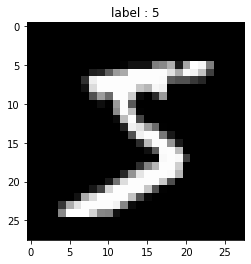

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

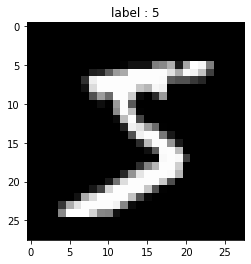

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [137]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image)

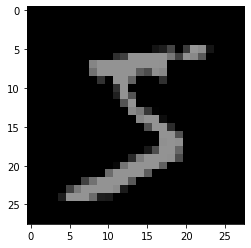

In [138]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [139]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min())

1.0
0.0


In [140]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) 

(60000,)
(60000, 10)
float64


In [141]:
X_train.shape

(60000, 784)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape)

(48000, 784)
(12000, 784)


In [144]:
np.argmax(y_train,axis=1)

array([1, 1, 6, ..., 7, 7, 4])

In [145]:
np.argmax(y_val,axis=1)

array([3, 4, 5, ..., 5, 2, 3])

In [112]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

 # 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [114]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
n_output = 10
W1 = sigma * np.random.randn(n_features, n_nodes1)
n_nodes2 = 200
n_nodes3 = 10

W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b1 = sigma * np.random.randn(n_nodes1)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_nodes3)
print(W1.shape,"W1")
print(W2.shape,"W2")
print(b1.shape,"b1")
print(b2.shape,"b2")
print(W3.shape,"W3")
print(b3.shape,"b3")

(784, 400) W1
(400, 200) W2
(400,) b1
(200,) b2
(200, 10) W3
(10,) b3


 # 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

 # 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。

多クラス分類の目的関数である交差エントロピー誤差 
L
 は次の数式です。

  # 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。

数式を以下に示します。

まず、i層目の重みとバイアスの更新式です。 
W
i
 と 
B
i
 に対し、更新後の 
W
′
i
 と 
B
′
i
 は次の数式で求められます。

# 【問題5】推定
推定を行うメソッドを作成してください。

フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

In [132]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
i = 0

for mini_X_train, mini_y_train in get_mini_batch:

    A1 = mini_X_train @ W1 + b1
    Z1 = np.tanh(A1)
    A2 = Z1 @ W2 + b2

    Z2 = np.tanh(A2)
    A3 = Z2 @ W3 + b3
    
    out = np.exp(A3) / np.sum(np.exp(A3))
    Loss = - np.sum(mini_y_train * np.log(out)) / 20


In [22]:
def Loss(y,pred,batch_size):
    Loss = - np.sum(y * np.log(pred) + 1e-7) / batch_size

In [23]:
y_train.shape

(48000, 10)

In [148]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self , epochs = 10 , alpha = 0.001 ,sigma = 0.01,n_nodes1= 400 , n_nodes2 = 200 , n_features = 784, n_output = 10 , batch_size = 20, verbose = True):
        self.verbose = verbose
        self.sigma = sigma
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.n_features = n_features
        self.batch_size = batch_size
        self.alpha = alpha
        self.loss = []
        self.val_loss = []
        self.epochs = epochs
     
    
    def init_network(self):
        network = {}
        network["W1"] =  self.sigma * np.random.randn(self.n_features , self.n_nodes1)#一層目の重み
        network["b1"] = self.sigma * np.random.randn(self.n_nodes1)
        network["W2"] = self.sigma * np.random.randn(self.n_nodes1 , self.n_nodes2)#二層目の重み
        network["b2"] = self.sigma * np.random.randn(self.n_nodes2)
        network["W3"] = self.sigma * np.random.randn(self.n_nodes2 , self.n_output)#出力層の重み
        network["b3"] =  self.sigma * np.random.randn(self.n_output)
        return network
    
    def sigmoid(self , X):
        c = np.max(X)
        X = X / c
        return 1 / (1 + np.exp(-X))
    

    def sigmoid_dev(self, X):
        c = np.max(X)
        X = X / c
        return (1 - self.sigmoid(X)) * self.sigmoid(X)
    


    def soft_max(self , X):
        if X.ndim == 2:
            X = X.T
            X = X - np.max(X, axis=0)
            y = np.exp(X) / np.sum(np.exp(X), axis=0)
            return y.T
        X = X - np.max(X)
        return np.exp(X) / np.sum(np.exp(X))
    
    def forward(self ,  X):
        # 1層
        self.A1 = np.dot(X , self.W1) + self.b1
        self.Z1 = self.sigmoid(self.A1)
        # 2層
        self.A2 = np.dot(self.Z1 , self.W2) + self.b2
        self.Z2 = self.sigmoid(self.A2)
        # ３層
        self.A3 = np.dot(self.Z2 , self.W3) + self.b3
        self.Z3 = self.soft_max(self.A3)

    
    def backward(self , y):
        # ３層
        delta_3 = self.Z3 - y
        LB_3 = np.sum(delta_3 , axis = 0)
        WL_3 = np.dot(self.Z2.T , delta_3)
        ZL_2 = np.dot(delta_3 , self.W3.T)
        self.W3 -= self.alpha * WL_3
        self.b3 -= self.alpha * LB_3
        
        # 2層
        delta_2 = ZL_2 * self.sigmoid_dev(self.A2)
        LB_2 = np.sum(delta_2 , axis = 0)
        WL_2 = np.dot(self.Z1.T , delta_2)
        ZL_1 = np.dot(delta_2 , self.W2.T)
        self.W2 -= self.alpha * WL_2
        self.b2 -= self.alpha * LB_2
        
        # 1層
        delta_1 = ZL_1 * self.sigmoid_dev(self.A1)
        LB_1 = np.sum(delta_1 , axis = 0)
        WL_1 = np.dot(self.mini_X_train.T , delta_1)
        self.W1 -= self.alpha * WL_1
        self.b1 -= self.alpha * LB_1

        
    def loss_fnk(self , y):
        loss = -np.sum(y * np.log(self.Z3) + 1e-7) / self.batch_size
        return loss
        
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        np.random.seed(1)
        self.network = self.init_network()
        self.W1 , self.W2 , self.W3 = self.network["W1"] , self.network["W2"] , self.network["W3"]
        self.b1 , self.b2 , self.b3 = self.network["b1"] , self.network["b2"] , self.network["b3"]
        
        for i in range(self.epochs):
            self.get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
            for self.mini_X_train, self.mini_y_train in self.get_mini_batch:
            # forward propagation
                self.forward(self.mini_X_train)
                self.backward(self.mini_y_train)  
            self.c_loss = self.loss_fnk(self.mini_y_train)
            self.loss.append(self.c_loss)
            
            if (X_val is not None) and (y_val is not None):
                self.forward(X_val)
                self.c_val_loss = self.loss_fnk(y_val)
                self.val_loss.append(self.c_val_loss)
        
        if self.verbose:
            print(self.W1)

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        self.forward(X)
        self.y_pred = np.argmax(self.Z3 , axis = 1)
        return self.y_pred
    

 # 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [166]:
SNN = ScratchSimpleNeuralNetrowkClassifier(n_nodes1= 400 , n_nodes2 = 400,epochs = 30 , alpha = 1e-3, verbose = False)
SNN.fit(X_train, y_train,X_val=None, y_val=None)

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
y_pred = SNN.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [169]:
accuracy_score(y_test, y_pred)

0.8286

 # 【問題7】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

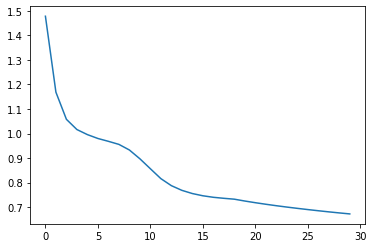

In [170]:
import matplotlib.pyplot as plt
plt.plot(range(len(SNN.loss)), SNN.loss)

 # 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


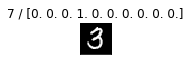

In [171]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')